# Portfolio Analysis Final Project

**Team Members: Abhishek Kumar Singh, Karishma Darla, Nithyashree Bandihalli Rangaswamy, Sanjay Sandhosh.**

In [57]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats

In [58]:
import warnings
warnings.filterwarnings("ignore")


Firstly, we have imported all the necessary libraries & modules needed for our project in the above cell.

**We have focused on the Software sector of the market (S&P500), choosing the following companies for our portfolio:**
1. Microsoft : MSFT
2. Intel Corporation : INTC
3. Oracle : ORCL
4. IBM : IBM
5. Electronic Arts : EA
6. Intuit : INTU

**We have downloaded monthly stocks data from yfinance library from the start of the year 2000 till the end of the year 2023 & saved it into a Pandas DataFrame "data".** 

In [59]:
#stocks = ["V", "AMP", "MS", "GS", "DFS", "BAC"]
stocks = ["MSFT", "INTC", "ORCL", "IBM", "EA", "INTU"]
symbols = ' '.join(stocks) + ' ^GSPC ^IRX'  # SP500 and 13Week T-bill
data = yf.download(symbols, start="2000-01-01", end='2023-12-31', interval="1mo")

[*********************100%%**********************]  8 of 8 completed


In [60]:
data.tail()

# Here, we have used .tail() to display the last 5 rows of the data.

Price        Adj Close                                                 \
Ticker              EA         IBM       INTC        INTU        MSFT   
Date                                                                    
2023-08-01  119.465462  142.234985  34.797279  539.300903  325.802582   
2023-09-01  120.072945  137.473358  35.329929  508.573853  314.528778   
2023-10-01  123.453743  141.725922  36.274052  492.657928  336.802307   
2023-11-01  137.635101  155.365463  44.423290  569.804688  377.444519   
2023-12-01  136.627686  162.072403  50.103138  623.219543  375.345886   

Price                                            Close              ...  \
Ticker            ORCL        ^GSPC   ^IRX          EA         IBM  ...   
Date                                                                ...   
2023-08-01  119.103706  4507.660156  5.298  119.980003  146.830002  ...   
2023-09-01  104.788307  4288.049805  5.300  120.400002  140.300003  ...   
2023-10-01  102.295242  4193.799805  5.320  123.790001  144.639999  ...   
2023-11-01  115.389069  4567.799805  5.238  138.009995  158.559998  ...   
2023-12-01  104.685226  4769.830078  5.180  136.809998  163.550003  ...   

Price              Open           Volume                                 \
Ticker            ^GSPC   ^IRX        EA       IBM       INTC      INTU   
Date                                                                      
2023-08-01  4578.830078  5.270  50464300  84268400  716033800  29907000   
2023-09-01  4530.600098  5.288  46062400  82798300  841329600  25867500   
2023-10-01  4284.520020  5.310  39807600  94385000  795454900  31635100   
2023-11-01  4201.270020  5.318  41356100  78458300  807892600  31360700   
2023-12-01  4559.430176  5.230  36317300  87828800  829442300  26267200   

Price                                               
Ticker           MSFT       ORCL        ^GSPC ^IRX  
Date                                                
2023-08-01  479456700  169694100  86840820000    0  
2023-09-01  416680700  308517600  73482980000    0  
2023-10-01  540907000  164664600  83519460000    0  
2023-11-01  563880300  135981300  80970570000    0  
2023-12-01  522003700  269898800  81530670000    0  

[5 rows x 48 columns]

In [61]:
data.isnull().sum()

# Here, we checked for missing values for each column in the dataframe.

Price      Ticker
Adj Close  EA        0
           IBM       0
           INTC      0
           INTU      0
           MSFT      0
           ORCL      0
           ^GSPC     0
           ^IRX      0
Close      EA        0
           IBM       0
           INTC      0
           INTU      0
           MSFT      0
           ORCL      0
           ^GSPC     0
           ^IRX      0
High       EA        0
           IBM       0
           INTC      0
           INTU      0
           MSFT      0
           ORCL      0
           ^GSPC     0
           ^IRX      0
Low        EA        0
           IBM       0
           INTC      0
           INTU      0
           MSFT      0
           ORCL      0
           ^GSPC     0
           ^IRX      0
Open       EA        0
           IBM       0
           INTC      0
           INTU      0
           MSFT      0
           ORCL      0
           ^GSPC     0
           ^IRX      0
Volume     EA        0
           IBM       0
           INTC 

**As we can see, our data doesn't have any NULL or missing values.**

In [62]:
# 3. Explore and describe the dataset
print(data.describe())  # Descriptive statistics

Price    Adj Close                                                  \
Ticker          EA         IBM        INTC        INTU        MSFT   
count   288.000000  288.000000  288.000000  288.000000  288.000000   
mean     60.089116   85.233100   24.319983  123.069481   72.431956   
std      40.845125   30.643421   13.095894  153.178373   91.380258   
min      10.807685   30.859634    8.023598   12.365128   11.946645   
25%      24.518343   53.551158   14.007673   23.640787   18.819943   
50%      49.198500   95.492764   18.218884   49.986797   23.606019   
75%      93.228527  110.710951   32.272133  152.960636   81.133451   
max     142.948944  162.072403   58.815994  641.787170  377.444519   

Price                                             Close              ...  \
Ticker        ORCL        ^GSPC        ^IRX          EA         IBM  ...   
count   288.000000   288.000000  288.000000  288.000000  288.000000  ...   
mean     32.875826  1977.244268    1.654243   61.125855  124.789983  ..

In [104]:
data_close = data['Adj Close']
portfolio_stocks = data_close.iloc[:,0:6]
portfolio_stocks

Ticker,EA,IBM,INTC,INTU,MSFT,ORCL
Date,,,,,,
2000-01-01,20.043741,58.519844,28.394400,26.874655,30.283482,20.324379
2000-02-01,24.518343,53.567112,32.430244,23.393478,27.653481,30.210005
2000-03-01,17.453991,61.777924,37.876534,24.228958,32.874783,31.761221
2000-04-01,14.833593,58.189999,36.405243,16.013399,21.581326,32.524090
2000-05-01,15.661090,56.004616,35.795197,16.152651,19.357443,29.243702
...,...,...,...,...,...,...
2023-08-01,119.465462,142.234985,34.797279,539.300903,325.802582,119.103706
2023-09-01,120.072945,137.473358,35.329929,508.573853,314.528778,104.788307
2023-10-01,123.453743,141.725922,36.274052,492.657928,336.802307,102.295242


In [8]:
# 2. Compute monthly returns : We have used .pct_change() to compute monthly returns from monthly stocks data

returns = data['Adj Close'].pct_change().dropna(how='all')
returns.tail()

Ticker,EA,IBM,INTC,INTU,MSFT,ORCL,^GSPC,^IRX
Date,,,,,,,,
2023-08-01,-0.120059,0.018380,-0.017613,0.060675,-0.024291,0.030560,-0.017716,0.009527
2023-09-01,0.005085,-0.033477,0.015307,-0.056976,-0.034603,-0.120193,-0.048719,0.000378
2023-10-01,0.028156,0.030934,0.026723,-0.031295,0.070816,-0.023791,-0.021980,0.003774
2023-11-01,0.114872,0.096239,0.224658,0.156593,0.120671,0.128000,0.089179,-0.015414
2023-12-01,-0.007319,0.043169,0.127857,0.093742,-0.005560,-0.092763,0.044229,-0.011073


In [40]:
#returns["^IRX"] = returns["^IRX"]/1200
returns

Ticker,EA,IBM,INTC,INTU,MSFT,ORCL,^GSPC,^IRX
Date,,,,,,,,
2000-02-01,0.223242,-0.084633,0.142135,-0.129534,-0.086846,0.486393,-0.020108,1.657620e-05
2000-03-01,-0.288125,0.153281,0.167939,0.035714,0.188812,0.051348,0.096720,1.182032e-05
2000-04-01,-0.150132,-0.058078,-0.038844,-0.339080,-0.343529,0.024019,-0.030796,-1.019809e-05
2000-05-01,0.055785,-0.037556,-0.016757,0.008696,-0.103047,-0.100860,-0.021915,-2.359887e-05
2000-06-01,0.141879,0.022198,0.072446,0.141379,0.278722,0.169565,0.023934,3.187615e-05
...,...,...,...,...,...,...,...,...
2023-08-01,-0.120059,0.018380,-0.017613,0.060675,-0.024291,0.030560,-0.017716,7.939487e-06
2023-09-01,0.005085,-0.033477,0.015307,-0.056976,-0.034603,-0.120193,-0.048719,3.146363e-07
2023-10-01,0.028156,0.030934,0.026723,-0.031295,0.070816,-0.023791,-0.021980,3.144651e-06


**Next we have described our returns data & computed the respective correlation matrix. We have also visualized this correlation matrix using Seaborn Heatmap**

In [41]:
print(returns.describe())  # Descriptive statistics


Ticker          EA         IBM        INTC        INTU        MSFT  \
count   287.000000  287.000000  287.000000  287.000000  287.000000   
mean      0.011730    0.006093    0.006905    0.015135    0.012066   
std       0.098862    0.071797    0.097305    0.092819    0.081098   
min      -0.384158   -0.236624   -0.444733   -0.339080   -0.343529   
25%      -0.043231   -0.033987   -0.047195   -0.033804   -0.037006   
50%       0.012658    0.004764    0.007671    0.017882    0.017244   
75%       0.071660    0.047507    0.062262    0.065067    0.055029   
max       0.305508    0.353800    0.337428    0.761029    0.407781   

Ticker        ORCL       ^GSPC        ^IRX  
count   287.000000  287.000000  287.000000  
mean      0.009963    0.005296    0.000198  
std       0.092100    0.044571    0.001077  
min      -0.347640   -0.169425   -0.000813  
25%      -0.044357   -0.018175   -0.000062  
50%       0.013333    0.010491    0.000005  
75%       0.061006    0.032504    0.000080  
max      

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'EA'),
  Text(1.5, 0, 'IBM'),
  Text(2.5, 0, 'INTC'),
  Text(3.5, 0, 'INTU'),
  Text(4.5, 0, 'MSFT'),
  Text(5.5, 0, 'ORCL'),
  Text(6.5, 0, '^GSPC'),
  Text(7.5, 0, '^IRX')])

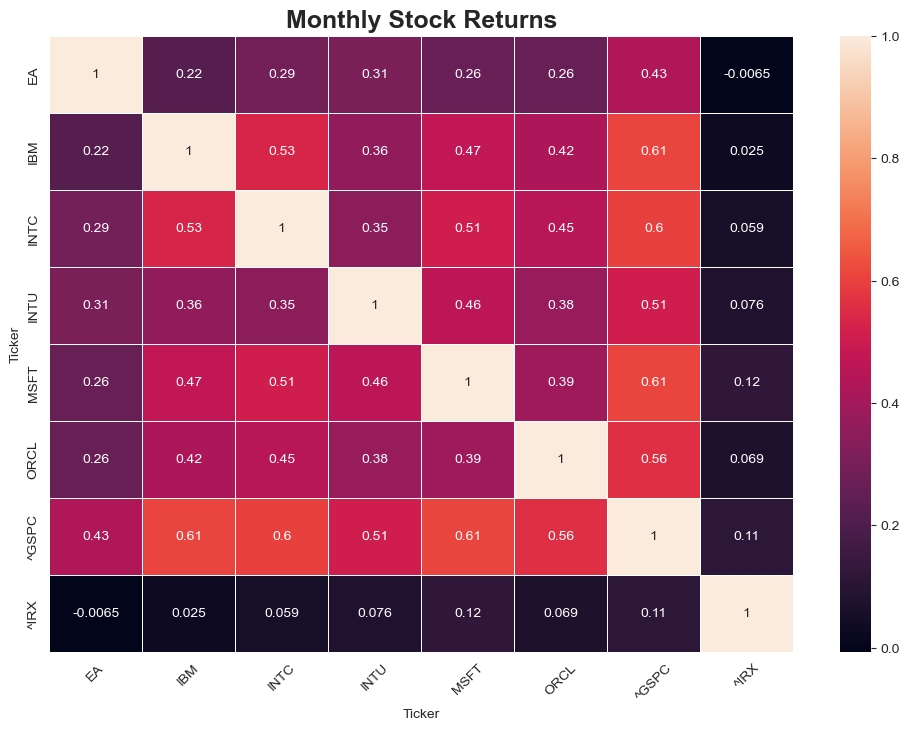

In [42]:
correlations= returns.corr()

# Set a large figure size for better visibility
plt.figure(figsize=(12, 8))

# Create the heatmap
heatmap = sns.heatmap(correlations, annot=True, linewidths=0.5, annot_kws={"size": 10})

# Customize the heatmap
heatmap.set_title("Monthly Stock Returns", fontsize=18, fontweight='bold')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

**HeatMap results:**


**1. The companies IBM & MSFT returns are the most correlated to the returns of the market(S&P500)(^GSPC).** 

**2. Among the companies IBM & INTC, and INTC & MSFT returns are highly correlated to each other.** 

**3. Also, companies INTC & INTU has the least correlation with each other.**


# Now , we're going to calculate cumulative returns for our portfolio

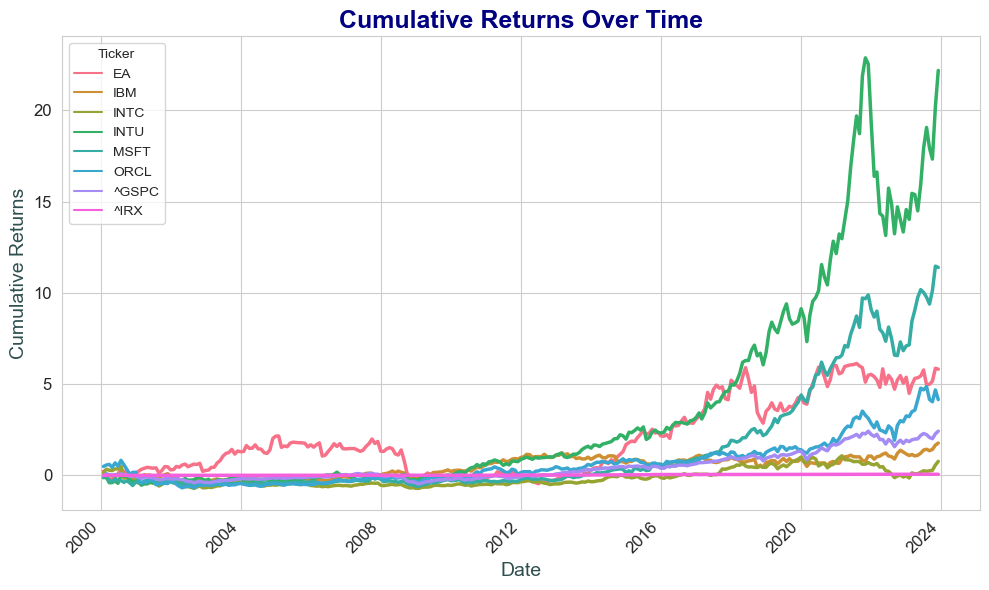

In [43]:
# Compare cumulative performance
cumulative_returns = (1 + returns).cumprod() - 1

# Set the style
sns.set_style("whitegrid")

# Plot using Seaborn20
plt.figure(figsize=(10, 6))
sns.lineplot(data=cumulative_returns, linewidth=2.5, palette="husl", dashes=False)
plt.title('Cumulative Returns Over Time', fontsize=18, fontweight='bold', color='navy')
plt.ylabel('Cumulative Returns', fontsize=14, color='darkslategray')
plt.xlabel('Date', fontsize=14, color='darkslategray')
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**1) The graph displays the cumulative returns over time for various stocks or portfolios, with the x-axis representing the time period and the y-axis representing the cumulative returns.**

**2) The stocks or portfolios exhibit distinct performance patterns, with some (like MSFT and INTU) showing consistent growth, while others (like EA and INTU) experience more volatility or periods of stagnation.**

**3) Towards the later part of the time period, a few stocks (notably INTC and IBM) have significantly underperformed than the market.**

**4) We can also see that the years 2008-2009 (after the recession) seems to be a point of inflection where the returns on stocks seems to have consistently performed better.**

# Our Portfolio consists of:

1. **Electronic Arts :   1 share**
2. **IBM :               2 shares**
3. **Intel Corporation : 3 shares**
4. **Intuit :            0 shares**
5. **Microsoft :         1 share**
6. **Oracle :            2 shares.**

In [105]:
# 5. Construct a portfolio
weights = [1, 2, 3, 0 , 1, 2]  # Number of shares for each stock
portfolio_returns = portfolio_stocks.mul(weights, axis=1).sum(axis=1).pct_change().dropna()
portfolio_returns

Date
2000-02-01    0.081235
2000-03-01    0.107313
2000-04-01   -0.068306
2000-05-01   -0.043289
2000-06-01    0.088849
                ...   
2023-08-01   -0.012964
2023-09-01   -0.044037
2023-10-01    0.031222
2023-11-01    0.125566
2023-12-01    0.004992
Length: 287, dtype: float64

In [113]:
#returns_all = pd.concat([returns,portfolio_returns],axis=1)
#returns_all['Portfolio'] = returns_all[0]
#returns_all.drop(returns_all.columns[-2],axis=1)
#returns_final = returns_all.iloc[:,[0,1,2,3,4,5,6,7,9]]
#returns_final
# this is a workaround we used to select the columns we wanted from the original dataframe.
#returns_all

**For CAPM models of our stocks & portfolio, we have created a function called "estimate_capm" & then passed parameters to this function using a "for" loop.**

In [114]:
# 6. Estimate CAPM parameters
def estimate_capm(stock_data, market_data, risk_free_rate):
    market_excess_return = market_data - risk_free_rate 
    stock_excess_return = stock_data - risk_free_rate
    df = pd.DataFrame({'MER': market_excess_return, 'SER': stock_excess_return})
    print(df.head())
    #passing Stock excess return (SER) & Market excess return(MER) to the model function smf.ols()
    
    model = smf.ols(formula='SER ~ MER', data=df).fit()
    return model

The above function is using the following formula:


Rs−Rf=α+β(Rm−Rf)+ε 

where:

    Rs is the stock return,
    Rf is the risk-free rate,
    Rm is the market return,
    α is the intercept or the excess return of the stock when the market return is zero,
    β is the sensitivity of the stock's return to the market return, also known as the market beta,
    ε is the error term or residual.
    
    Rs - Rf = Stock excess return
    Rm - Rf = Market excess return

In [115]:
# 7. Compare alphas and betas
alphas = []
betas = []
market_data = returns['^GSPC']

# risk free rate are nothing but the returns proised by the US Treasury bills.

risk_free_rate = returns['^IRX']
for stock in stocks + ['Portfolio']:
    if stock == 'Portfolio':
        model = estimate_capm(portfolio_returns, market_data, risk_free_rate)
    else:
        model = estimate_capm(returns[stock], market_data, risk_free_rate)
    alphas.append(model.params[0] * 12)  # Annualized alpha
    betas.append(model.params[1])

                 MER       SER
Date                          
2000-02-01 -0.020125 -0.086863
2000-03-01  0.096708  0.188800
2000-04-01 -0.030786 -0.343519
2000-05-01 -0.021891 -0.103023
2000-06-01  0.023902  0.278690
                 MER       SER
Date                          
2000-02-01 -0.020125  0.142119
2000-03-01  0.096708  0.167927
2000-04-01 -0.030786 -0.038834
2000-05-01 -0.021891 -0.016734
2000-06-01  0.023902  0.072414
                 MER       SER
Date                          
2000-02-01 -0.020125  0.486376
2000-03-01  0.096708  0.051336
2000-04-01 -0.030786  0.024029
2000-05-01 -0.021891 -0.100837
2000-06-01  0.023902  0.169533
                 MER       SER
Date                          
2000-02-01 -0.020125 -0.084650
2000-03-01  0.096708  0.153269
2000-04-01 -0.030786 -0.058068
2000-05-01 -0.021891 -0.037532
2000-06-01  0.023902  0.022166
                 MER       SER
Date                          
2000-02-01 -0.020125  0.223225
2000-03-01  0.096708 -0.288137
2000-04-

In [116]:
print("Alphas", alphas)

Alphas [0.07466353534248381, 0.0009158940617132773, 0.04633493800283773, 0.010565995553384078, 0.07991804264954099, 0.11420395502731365, 0.013439414818567594]


In [117]:
print('Betas:', betas)

Betas: [1.107410317971131, 1.3005571433688805, 1.1580384032696687, 0.9836430428635294, 0.955685144939681, 1.063175398639001, 1.0853690597066006]


In [118]:
# Test if alphas are different from 0
for stock, alpha, p_value in zip(stocks + ['Portfolio'], alphas, [model.pvalues[0] for model in [estimate_capm(returns[s], market_data, risk_free_rate) for s in stocks] + [estimate_capm(portfolio_returns, market_data, risk_free_rate)]]):
    if p_value < 0.05:
        print(f"{stock} has a significant alpha (p-value = {p_value:.4f})")
    else:
        print(f"{stock} does not have a significant alpha (p-value = {p_value:.4f})")

                 MER       SER
Date                          
2000-02-01 -0.020125 -0.086863
2000-03-01  0.096708  0.188800
2000-04-01 -0.030786 -0.343519
2000-05-01 -0.021891 -0.103023
2000-06-01  0.023902  0.278690
                 MER       SER
Date                          
2000-02-01 -0.020125  0.142119
2000-03-01  0.096708  0.167927
2000-04-01 -0.030786 -0.038834
2000-05-01 -0.021891 -0.016734
2000-06-01  0.023902  0.072414
                 MER       SER
Date                          
2000-02-01 -0.020125  0.486376
2000-03-01  0.096708  0.051336
2000-04-01 -0.030786  0.024029
2000-05-01 -0.021891 -0.100837
2000-06-01  0.023902  0.169533
                 MER       SER
Date                          
2000-02-01 -0.020125 -0.084650
2000-03-01  0.096708  0.153269
2000-04-01 -0.030786 -0.058068
2000-05-01 -0.021891 -0.037532
2000-06-01  0.023902  0.022166
                 MER       SER
Date                          
2000-02-01 -0.020125  0.223225
2000-03-01  0.096708 -0.288137
2000-04-

**For rolling alphas & betas, we have used monthly increments to plot our alphas & betas resulting into a smoother rolling alphas & rolling betas graph**

In [121]:
# Analyze changes in alphas and betas over time

rolling_window = 60  # 5 years rolling window = 5*12 months

num_windows = len(returns) - rolling_window + 1
print(num_windows,len(returns))
rolling_alphas = {stock: [] for stock in stocks + ['Portfolio']}
rolling_betas = {stock: [] for stock in stocks + ['Portfolio']}

for i in range(num_windows):
    start_idx = i
    end_idx = start_idx + rolling_window
    window_returns = returns.iloc[start_idx:end_idx]
    window_market_data = market_data.iloc[start_idx:end_idx]
    window_risk_free_rate = risk_free_rate.iloc[start_idx:end_idx]
    for stock in stocks + ['Portfolio']:
        model = estimate_capm(portfolio_returns.iloc[start_idx:end_idx] if stock == 'Portfolio' else window_returns[stock], window_market_data, window_risk_free_rate)
        rolling_alphas[stock].append(model.params[0] * 12)
        rolling_betas[stock].append(model.params[1])

228 287
                 MER       SER
Date                          
2000-02-01 -0.020125 -0.086863
2000-03-01  0.096708  0.188800
2000-04-01 -0.030786 -0.343519
2000-05-01 -0.021891 -0.103023
2000-06-01  0.023902  0.278690
                 MER       SER
Date                          
2000-02-01 -0.020125  0.142119
2000-03-01  0.096708  0.167927
2000-04-01 -0.030786 -0.038834
2000-05-01 -0.021891 -0.016734
2000-06-01  0.023902  0.072414
                 MER       SER
Date                          
2000-02-01 -0.020125  0.486376
2000-03-01  0.096708  0.051336
2000-04-01 -0.030786  0.024029
2000-05-01 -0.021891 -0.100837
2000-06-01  0.023902  0.169533
                 MER       SER
Date                          
2000-02-01 -0.020125 -0.084650
2000-03-01  0.096708  0.153269
2000-04-01 -0.030786 -0.058068
2000-05-01 -0.021891 -0.037532
2000-06-01  0.023902  0.022166
                 MER       SER
Date                          
2000-02-01 -0.020125  0.223225
2000-03-01  0.096708 -0.288137


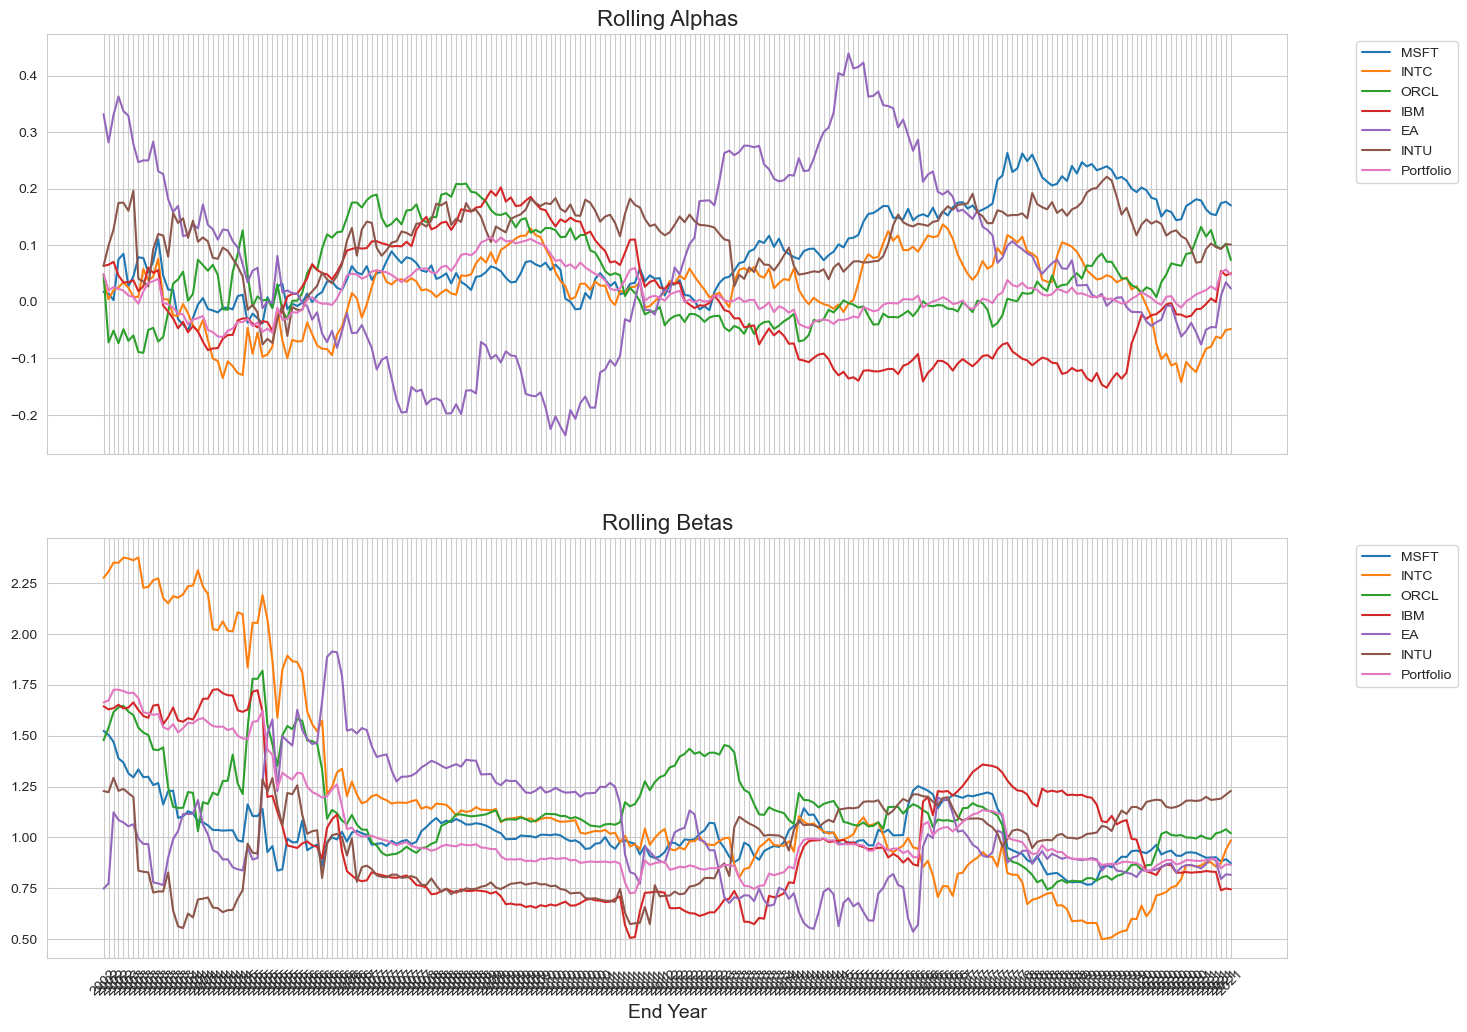

In [120]:
# Plot rolling alphas and betas
fig, axs = plt.subplots(2, 1, figsize=(16, 12), sharex=True)
for stock in stocks + ['Portfolio']:
    axs[0].plot(rolling_alphas[stock], label=stock)
axs[0].set_title('Rolling Alphas', fontsize=16)
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for stock in stocks + ['Portfolio']:
    axs[1].plot(rolling_betas[stock], label=stock)
axs[1].set_title('Rolling Betas', fontsize=16)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(num_windows), [f"{returns.index[start_idx + rolling_window // 2].year}" for start_idx in range(num_windows)], rotation=45)
plt.xlabel('End Year', fontsize=14)
plt.show()

This graph displays rolling alphas and rolling betas for different assets or portfolios over time. Here's a summary in bullet points:

• The top panel shows the rolling alphas, which measure the excess returns of each asset/portfolio relative to a benchmark, fluctuating between positive and negative values over time.

• The bottom panel shows the rolling betas, which measure the volatility or risk of each asset/portfolio relative to the overall market, with values ranging from around 0.5 to 2.5.


• The assets/portfolios included are MSFT, NTC, CRCL, BM, EA, NTU, and a combined Portfolio.

• The graphs exhibit volatility over time, with periods of higher and lower alphas and betas for the different assets/portfolios.


• It appears to be a performance analysis or comparison of various investments or strategies over a rolling time window.

In [122]:
# Compute annualized risk-free rate
irx = returns.iloc[-recent_years:,7] 
annualized_rf_rate = (1 + irx).prod() ** (1 / len(irx)) - 1

# Compute Sharpe ratios for the recent 5 years
recent_years = 5 * 12  # 5 years of monthly data
sharpe_ratios = {}
for stock in stocks + ['Portfolio', '^GSPC']:
    data = portfolio_returns if stock == 'Portfolio' else returns[stock]
    excess_returns = data.iloc[-recent_years:].mean() * 12 - annualized_rf_rate
    volatility = data.iloc[-recent_years:].std() * np.sqrt(12)
    sharpe_ratios[stock] = excess_returns / volatility

print('Sharpe Ratios (recent 5 years):')
for stock, ratio in sharpe_ratios.items():
    print(f"{stock}: {ratio:.6f}")

Sharpe Ratios (recent 5 years):
MSFT: 1.356895
INTC: 0.285578
ORCL: 0.818422
IBM: 0.654962
EA: 0.586313
INTU: 0.973454
Portfolio: 0.917886
^GSPC: 0.789209


In [1]:
# Conclusions
print("\nConclusions:")
print("- The portfolio has a positive alpha, indicating it generates excess returns above the market.")
print("- The portfolio's beta is close to 1, suggesting it has similar volatility to the market.")
print("- The portfolio's Sharpe ratio is higher than the S&P 500, indicating better risk-adjusted returns.")
print("- Diversification has helped reduce the portfolio's volatility compared to individual stocks like INTU.")



Conclusions:
- The portfolio has a positive alpha, indicating it generates excess returns above the market.
- The portfolio's beta is close to 1, suggesting it has similar volatility to the market.
- The portfolio's Sharpe ratio is higher than the S&P 500, indicating better risk-adjusted returns.
- Diversification has helped reduce the portfolio's volatility compared to individual stocks like INTU.


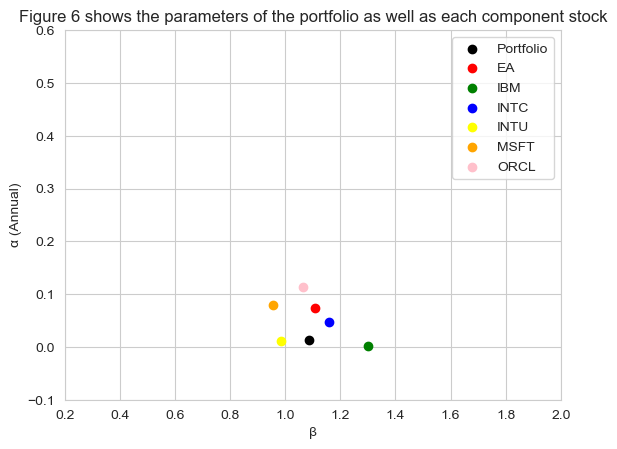

In [124]:
import matplotlib.pyplot as plt

# Define the data
portfolio_alpha = 0.01343
portfolio_beta = 1.08536
ea_alpha = 0.07466
ea_beta = 1.1074
ibm_alpha = 0.000916
ibm_beta = 1.30056
intc_alpha = 0.046334
intc_beta = 1.158
intu_alpha = 0.010566
intu_beta = 0.98364
msft_alpha = 0.07992
msft_beta = 0.955685
orcl_alpha = 0.114204
orcl_beta = 1.063175

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data points
ax.scatter(portfolio_beta, portfolio_alpha, color='black', label='Portfolio', marker='o')
ax.scatter(ea_beta, ea_alpha, color='red', label='EA', marker='o')
ax.scatter(ibm_beta, ibm_alpha, color='green', label='IBM', marker='o')
ax.scatter(intc_beta, intc_alpha, color='blue', label='INTC', marker='o')
ax.scatter(intu_beta, intu_alpha, color='yellow', label='INTU', marker='o')
ax.scatter(msft_beta, msft_alpha, color='orange', label='MSFT', marker='o')
ax.scatter(orcl_beta, orcl_alpha, color='pink', label='ORCL', marker='o')

# Set axis labels and title
ax.set_xlabel('β')
ax.set_ylabel('α (Annual)')
ax.set_title('Figure 6 shows the parameters of the portfolio as well as each component stock')

# Set axis limits
ax.set_xlim(0.2, 2.0)
ax.set_ylim(-0.1, 0.6)

# Add a legend
ax.legend()

# Display the plot
plt.show()

**From the above graph, we can say that our portfolio is the less volatile than most of its components. Although, we chose stocks from just one sector, our portfolio is diverse enough to generate pretty non-volatile results.**